### Pretrained

In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
from tqdm.notebook import tqdm
import re
from typing import List
import os
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import numpy as np
import gensim.downloader as api


In [3]:
def load_docs(source_dir: str) -> List[List[str]]:
    docs = []
    for doc_name in os.listdir(source_dir):
        if os.path.isdir(doc_name):
            continue
        with open(f'{source_dir}/{doc_name}') as fh:
            doc = fh.readlines()
            docs.append(doc)
    return docs

In [4]:
docs = load_docs('clean_txt')

In [5]:
docs_tokenized = [sent.split() for doc in docs for sent in doc]

In [6]:
print(api.load('glove-wiki-gigaword-200', return_path=True))

/home/uadmin/gensim-data/glove-wiki-gigaword-200/glove-wiki-gigaword-200.gz


In [7]:
# # https://radimrehurek.com/gensim/models/word2vec.html#:~:text=common_texts%5D%2C%20min_count%3D1)-,Pretrained%20models,-Gensim%20comes%20with

# pretrained_vectors = api.load('glove-wiki-gigaword-300')

In [8]:
%%time

import gensim

model = '/home/uadmin/gensim-data/glove-wiki-gigaword-200/glove-wiki-gigaword-200.gz'

pretrained_vectors = gensim.models.KeyedVectors.load_word2vec_format(model, binary=False)

CPU times: user 33.9 s, sys: 214 ms, total: 34.1 s
Wall time: 34.1 s


In [9]:
## unnormalized
pretrained_vectors.fill_norms()
pretrained_vectors.norms

array([5.6256924, 4.864203 , 4.901828 , ..., 4.514674 , 4.4918313,
       3.9017522], dtype=float32)

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

def show_similarity_for_single_word(vectors, word):
    matrix = cosine_similarity(vectors[word].reshape(1, -1), vectors.vectors)
    plt.hist(matrix.squeeze(0), bins='rice', edgecolor='k')
    plt.title(f'Распределение схожести для слова {word}')

In [23]:
# pretrained_vectors.key_to_index

In [11]:
pretrained_vectors.most_similar('varicose')

[('veins', 0.7123990058898926),
 ('hemorrhoids', 0.5619627237319946),
 ('vein', 0.5328717231750488),
 ('sclerotherapy', 0.5134063959121704),
 ('thrombosis', 0.4759078323841095),
 ('phlebitis', 0.47333014011383057),
 ('clots', 0.46471312642097473),
 ('thrombophlebitis', 0.4622771441936493),
 ('fibroids', 0.4576674699783325),
 ('aneurysms', 0.4559440016746521)]

In [30]:
pretrained_vectors.most_similar('thrombosis')

[('dvt', 0.695932149887085),
 ('embolism', 0.683134913444519),
 ('clots', 0.6449497938156128),
 ('venous', 0.6349796652793884),
 ('clot', 0.6239162087440491),
 ('coronary', 0.5913086533546448),
 ('vein', 0.5786575675010681),
 ('pulmonary', 0.5700212717056274),
 ('thromboembolism', 0.5683554410934448),
 ('sinus', 0.5571774244308472)]

In [27]:
pretrained_vectors.most_similar('cardiology', topn=20)

[('radiology', 0.7757067680358887),
 ('oncology', 0.7672789096832275),
 ('neurology', 0.7595601677894592),
 ('dermatology', 0.73642897605896),
 ('gastroenterology', 0.7253237962722778),
 ('neurosurgery', 0.7115159034729004),
 ('urology', 0.698523223400116),
 ('pediatric', 0.6975681781768799),
 ('rheumatology', 0.6813408136367798),
 ('ophthalmology', 0.6759422421455383),
 ('interventional', 0.6631497740745544),
 ('obstetrics', 0.6553765535354614),
 ('anesthesiology', 0.6483817100524902),
 ('endocrinology', 0.6464000344276428),
 ('pediatrics', 0.6454578638076782),
 ('hematology', 0.6423797607421875),
 ('gynecology', 0.6350332498550415),
 ('psychiatry', 0.634688675403595),
 ('nephrology', 0.630325973033905),
 ('paediatric', 0.6218659281730652)]

In [13]:
pretrained_vectors.most_similar('blood')

[('heart', 0.6108990907669067),
 ('urine', 0.5993350744247437),
 ('transfusions', 0.560692548751831),
 ('transfusion', 0.5605494379997253),
 ('bleeding', 0.5571826696395874),
 ('lungs', 0.5441170930862427),
 ('tissue', 0.5380828380584717),
 ('samples', 0.5224605798721313),
 ('liver', 0.5163336992263794),
 ('brain', 0.508567750453949)]

In [18]:
pretrained_vectors.most_similar('doctor')

[('physician', 0.7360212802886963),
 ('doctors', 0.6724056005477905),
 ('surgeon', 0.6551469564437866),
 ('dr.', 0.6524977087974548),
 ('nurse', 0.6514491438865662),
 ('medical', 0.6481887102127075),
 ('hospital', 0.6363801956176758),
 ('patient', 0.6191587448120117),
 ('dentist', 0.5847471952438354),
 ('psychiatrist', 0.5685710310935974)]

In [14]:
pretrained_vectors.most_similar('treatment')

[('treatments', 0.7339935898780823),
 ('treated', 0.7296231389045715),
 ('treat', 0.7193353772163391),
 ('patients', 0.7166020274162292),
 ('therapy', 0.6945323348045349),
 ('treating', 0.6901863813400269),
 ('patient', 0.6717613339424133),
 ('psychiatric', 0.6431329846382141),
 ('care', 0.6324152946472168),
 ('medication', 0.6259459853172302)]

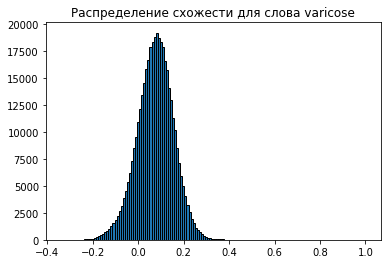

In [15]:
show_similarity_for_single_word(pretrained_vectors, 'varicose')

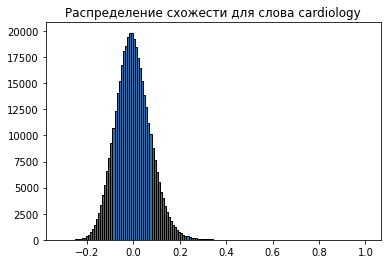

In [16]:
show_similarity_for_single_word(pretrained_vectors, 'cardiology')

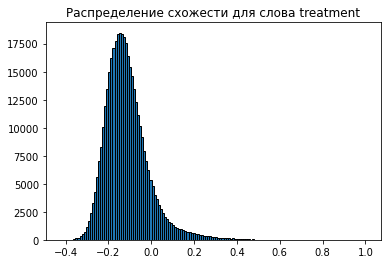

In [17]:
show_similarity_for_single_word(pretrained_vectors, 'treatment')